# Algoritmo de Todd Coxeter

Sea G un grupo definido por una presentación \\( G = \langle X | R \rangle \\), donde \\( X \\) es el conjunto de generadores y \\( R\\) el conjunto de relatores. Sea \\(H = < h_1, h_2,...,h_r> \leq G \\), donde los generadores \\( h_i \\) son palabras en el alfabeto \\( X^{\pm 1} \\)

El Algoritmo de Todd Coxeter resuelve el problema de la palabra (word problem) para el grupo \\( G \\) mediante la enumeración de clases de \\( G/H \\).






En primer lugar, importamos las librerías que se usará el programa:

In [1]:
from ToddCoxeter import CosetTable, readGroup
from Group import *
from IPython.display import display, Image,HTML


- Los generadores X serán letras del abecedario \\((a,b,c...)\\) y el elemento inverso de cada generador será representado por la misma letra pero en mayúscula. 
 

- Las relaciones serán palabras en el alfabeto \\( X^{\pm 1}\\) y se deben dar igualadas a 1. Por ejemplo:
    
    \\[ a^3b^2 = 1 \leftrightarrow aaabb \\]
 \\[ aba^{-1}b^{-1}=1 \leftrightarrow abAB \\]


Consideremos el siguiente ejemplo:

In [2]:
gen = ['a','b']
rels = ['aa','bb','abAB']
genH = []


Internamente, el algoritmo de Todd Coxeter trabaja con una tabla de clases laterales de \\( G \\) sobre \\( H \\)
 - El constructor de la clase se encarga de crear las variables necesarias a partir de la presentación dada.
 - El método que devuelve la tabla es \\( coset\_table() \\). Inicialmente, al crear el objeto la tabla estará vacía.

In [4]:
C = CosetTable(gen,rels, genH)

La función que ejecuta el método principal se denomina \\( CosetEnumeration() \\).  
En ella se refleja la acción a la derecha de \\( G \\) sobre \\( G/H \\). 


In [6]:
C.CosetEnumeration()

Ahora bien, podemos mostrar la tabla de clases laterales y el grafo de Schreier asociado. Las funciones, respectivamente, son \\( coset\_table() \\) y \\( schreier\_graph() \\).
- Por teoría de grupos, el número de clases laterales coincide con el índice \\( [G:H]\\). 
- En nuestro programa, las clases laterales se representan por números \\( (1,2,3...) \\) .

┌───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │
├───┼───┼───┼───┼───┤
│ 1 │ 2 │ 2 │ 3 │ 3 │
├───┼───┼───┼───┼───┤
│ 2 │ 1 │ 1 │ 4 │ 4 │
├───┼───┼───┼───┼───┤
│ 3 │ 4 │ 4 │ 1 │ 1 │
├───┼───┼───┼───┼───┤
│ 4 │ 3 │ 3 │ 2 │ 2 │
└───┴───┴───┴───┴───┘


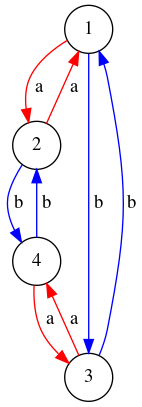

In [10]:
T = C.coset_table()
print(T)

C.schreier_graph(notes=False)

In [11]:
def print_gens(gens):
    for i in range(len(gens)):
        print("g{} = {}".format(i, gens[i]))
        
generators = C.getGenerators()
print_gens(generators)


g0 = (1, 2)(3, 4)
g1 = (1, 3)(2, 4)


In [12]:
G = Group(elems=generators)
print(G)

Group with 4 elements: {(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)}


Al darle estructura de grupo, se pueden llamar a todos los métodos de la librería

In [ ]:
G.table()

In [13]:
print(G.elements_order())

{(): 1, (1, 2)(3, 4): 2, (1, 4)(2, 3): 2, (1, 3)(2, 4): 2}


In [14]:
K = KleinGroup()
G.is_isomorphic(K)

True

# Problemas del Algoritmo de Todd Coxeter

## Coincidencias

En el proceso de definición de clases, se puede dar la situación de que dos clases distintas resultan ser la misma, es decir, están en la misma clase de equivalencia. Esto se conoce como \\(coincidencia\\) y, cuando se detecta una, se ha de reemplazar el grafo de Schreier por un grafo cociente que refleje dicha coincidencia.

$G = \langle a, b \mid ab^{-1}b^{-1}a^{-1}bbb, b^{-1}a^{-1}a^{-1}baaa\rangle$ y $H = \{ 1 \}$.

In [15]:
file = "Groups/1.txt"

f = readGroup(file)
print(f)

(['a', 'b'], ['aBBAbbb', 'BAAbaaa'], [])


In [17]:
G = CosetTable(f)
G.CosetEnumeration()

┌───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │
├───┼───┼───┼───┼───┤
│ 1 │ 1 │ 1 │ 1 │ 1 │
└───┴───┴───┴───┴───┘
Arrow from 1  to  1  coloured of  red
Arrow from 1  to  1  coloured of  blue


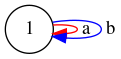

In [18]:
print(G.table)
G.schreier_graph()


## Memoria


Uno de los principales problemas del algoritmo es su elevado uso de memoria. 
Para controlarla, se hacen uso de 2 variables:

- \\(M \\), indica el tope de memoria disponible, es decir, el máximo número de clases (tamaño de la tabla) que se permiten. Inicializado a \\(1E6\\).

- \\(n \\), indica el número de clases que se han utilizado en la ejecución.


El conjunto de las clases vivas, denotado por \\( \Omega \\) se define como:

\\[  \Omega = \{ \alpha \in [1,\ldots,n] \; | \;  p(\alpha)= \alpha \}\\]

Las clases usadas en la ejecución del algoritmo se pueden ver con el método \\( usedCosets()\\), mientras 
que el número de clases finales (clases vivas) se consultan con \\(finalCosets() \\).



In [19]:
u = G.usedCosets()
f = G.finalCosets()

print("Clases usadas: {} \n Clases vivas: {}".format(u,f))

Clases usadas: 85 
 Clases vivas: 1


¿Por qué se usan tantas clases en el algoritmo y únicamente 1 de ellas está viva?

## Conocer la estructura de G y H usando la librería


In [20]:
file = "Groups/3gens.txt"
f = readGroup(file)
print(f)

G = CosetTable(f)
G.CosetEnumeration()
print(G.coset_table())

(['a', 'b', 'c'], ['aaaaaa', 'bb', 'cc', 'abc'], ['b'])
┌───┬───┬───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │ c │ C │
├───┼───┼───┼───┼───┼───┼───┤
│ 1 │ 2 │ 6 │ 1 │ 1 │ 6 │ 6 │
├───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 3 │ 1 │ 6 │ 6 │ 5 │ 5 │
├───┼───┼───┼───┼───┼───┼───┤
│ 3 │ 4 │ 2 │ 5 │ 5 │ 4 │ 4 │
├───┼───┼───┼───┼───┼───┼───┤
│ 4 │ 5 │ 3 │ 4 │ 4 │ 3 │ 3 │
├───┼───┼───┼───┼───┼───┼───┤
│ 5 │ 6 │ 4 │ 3 │ 3 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┤
│ 6 │ 1 │ 5 │ 2 │ 2 │ 1 │ 1 │
└───┴───┴───┴───┴───┴───┴───┘


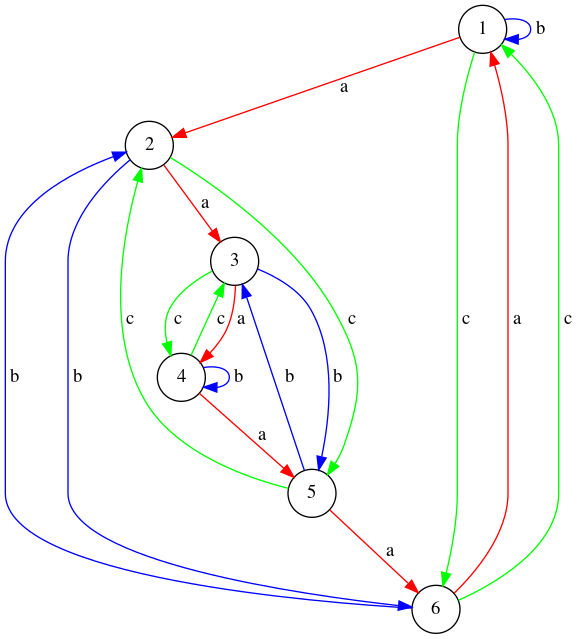

In [21]:
G.schreier_graph(notes=False)

In [22]:
generators = G.getGenerators()
print_gens(generators)
group = Group(elems=generators)

g0 = (1, 2, 3, 4, 5, 6)
g1 = (2, 6)(3, 5)
g2 = (1, 6)(2, 5)(3, 4)


In [23]:
print(group)

print(group.is_abelian())

Group with 12 elements: {(1, 5)(2, 4), (1, 2, 3, 4, 5, 6), (1, 4)(2, 5)(3, 6), (1, 6)(2, 5)(3, 4), (1, 3)(4, 6), (1, 4)(2, 3)(5, 6), (), (2, 6)(3, 5), (1, 2)(3, 6)(4, 5), (1, 6, 5, 4, 3, 2), (1, 3, 5)(2, 4, 6), (1, 5, 3)(2, 6, 4)}
False


El grupo no es abeliano, luego se tiene que cumplir una de las siguientes condiciones:
    \\[  G \cong A_4 = \{ a,b \; | \; a^3=b^3=(ab)^2=1 \} \\]
     \\[  G \cong D_6 = \{ a,b \; | \; a^6=b^2=1, ab=a^{-1}b \} \\]
    \\[  G \cong Q_3 = \{ a,b \; | \; a^{6}=1, a^n=b^2, ab=a^{-1}b \}\\]

In [24]:
A = AlternatingGroup(4)
D = DihedralGroup(6)
Q = QuaternionGroupGeneralised(3)

print(group.is_isomorphic(A))
print(group.is_isomorphic(D))
print(group.is_isomorphic(Q))

False
True
False
